
--- SIMPLE LINEAR REGRESSION (Price vs Sqft Living) ---
MAE: 1601134.6357488493
MSE: 4506505949062.205
R²: 0.10842945504461843
Intercept: 2123152.259098625
Coefficient: [873140.74033566]


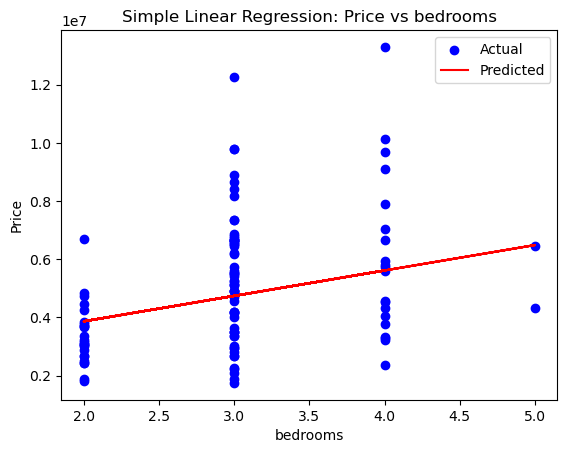


--- MULTIPLE LINEAR REGRESSION ---
MAE: 1462601.8965312992
MSE: 3737500333041.07
R²: 0.2605701076698277
Intercept: 1236464.4910654207
Coefficients: {'bedrooms': 452432.31563189893, 'bathrooms': 1683532.1281346504}


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("Housing.csv")  # Make sure this file is in the same folder

# Select relevant features
df = df[['bedrooms', 'bathrooms', 'price']]
df.dropna(inplace=True)

# -----------------------------
# SIMPLE LINEAR REGRESSION
# -----------------------------
print("\n--- SIMPLE LINEAR REGRESSION (Price vs Sqft Living) ---")

# Define features and target
X_simple = df[['bedrooms']]
y = df['price']

# Train-test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Fit model
simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)

# Predict
y_pred_s = simple_model.predict(X_test_s)

# Evaluation
print("MAE:", mean_absolute_error(y_test_s, y_pred_s))
print("MSE:", mean_squared_error(y_test_s, y_pred_s))
print("R²:", r2_score(y_test_s, y_pred_s))
print("Intercept:", simple_model.intercept_)
print("Coefficient:", simple_model.coef_)

# Plot
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', label='Predicted')
plt.title("Simple Linear Regression: Price vs bedrooms")
plt.xlabel("bedrooms")
plt.ylabel("Price")
plt.legend()
plt.show()

# -----------------------------
# MULTIPLE LINEAR REGRESSION
# -----------------------------
print("\n--- MULTIPLE LINEAR REGRESSION ---")

# Define multiple features
X_multi = df[['bedrooms', 'bathrooms']]

# Train-test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Fit model
multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

# Predict
y_pred_m = multi_model.predict(X_test_m)

# Evaluation
print("MAE:", mean_absolute_error(y_test_m, y_pred_m))
print("MSE:", mean_squared_error(y_test_m, y_pred_m))
print("R²:", r2_score(y_test_m, y_pred_m))
print("Intercept:", multi_model.intercept_)
print("Coefficients:", dict(zip(X_multi.columns, multi_model.coef_)))
